# Mod 3 Code Challenge Review

Today we'll be using the ["Census Income" dataset from the UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult)

The task is to predict the `income_level` attribute of a given person, which is either `>50K` or `<=50K`

The metric to optimize for is [`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/census_income.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,birth_place,income_level
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
birth_place       0
income_level      0
dtype: int64

In [6]:
df["income_level"].value_counts()

 <=50K    24720
 >50K      7841
Name: income_level, dtype: int64

In [7]:
df["target"] = df["income_level"] != "<=50K"

In [8]:
df["target"].value_counts()

True    32561
Name: target, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
df.drop("target", axis=1, inplace=True)

In [11]:
df["income_level"]

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income_level, Length: 32561, dtype: object

In [12]:
label_encoder = LabelEncoder()

In [13]:
label_encoder.fit_transform(df["income_level"])

array([0, 0, 0, ..., 0, 0, 1])

In [14]:
df["target"] = label_encoder.fit_transform(df["income_level"])

In [15]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,birth_place,income_level,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [16]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,birth_place,income_level,target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,1


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df.drop("income_level", axis=1, inplace=True)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis=1), df["target"], random_state=1)

In [20]:
from sklearn.dummy import DummyClassifier

In [21]:
dummy_model = DummyClassifier(strategy="most_frequent")

In [22]:
dummy_model.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [23]:
dummy_y_pred = dummy_model.predict(X_test)

In [24]:
from sklearn.metrics import roc_auc_score

In [25]:
roc_auc_score(y_test, dummy_y_pred)

0.5

In [26]:
dummy_model.score(X_train, y_train)

0.7541769041769042

In [27]:
dummy_model.score(X_test, y_test)

0.7742292101707406

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [29]:
scorer = make_scorer(roc_auc_score)

In [30]:
cross_val_score(dummy_model, X_train, y_train, scoring=scorer)

array([0.5, 0.5, 0.5, 0.5, 0.5])

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier()

In [33]:
rf.fit(X_train, y_train)

ValueError: could not convert string to float: ' Private'

In [38]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,birth_place
13474,51,Private,284211,HS-grad,9,Widowed,Prof-specialty,Unmarried,White,Female,0,0,35,United-States
28958,36,Private,119957,Bachelors,13,Separated,Other-service,Unmarried,Black,Female,0,0,35,United-States
14735,30,Self-emp-not-inc,164190,Prof-school,15,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
13215,22,Local-gov,289982,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,35,United-States
13460,41,Private,177905,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States


In [39]:
rf.fit(X_train[["age", "education_num", "hours_per_week"]], y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
cross_val_score(rf, X_train[["age", "education_num", "hours_per_week"]], y_train, scoring=scorer)

array([0.65990635, 0.65210641, 0.63861548, 0.65521401, 0.63905893])

In [41]:
numeric_features = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

In [42]:
cross_val_score(rf, X_train[numeric_features], y_train, scoring=scorer)

array([0.71239007, 0.69931596, 0.70227623, 0.7044755 , 0.70400481])

In [43]:
rf.fit(X_train[numeric_features], y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
roc_auc_score(y_train, rf.predict(X_train[numeric_features]))

0.9981694280730624

In [45]:
rf2 = RandomForestClassifier(min_samples_split=3)

In [46]:
rf2.fit(X_train[numeric_features], y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
roc_auc_score(y_train, rf2.predict(X_train[numeric_features]))

0.9882977824765197

In [48]:
cross_val_score(rf2, X_train[numeric_features], y_train, scoring=scorer)

array([0.70982356, 0.70253529, 0.70033039, 0.70592363, 0.71169774])

In [49]:
rf2.score(X_train[numeric_features], y_train)

0.9936117936117936

In [50]:
from sklearn.preprocessing import OneHotEncoder

In [92]:
ohe = OneHotEncoder(categories="auto", handle_unknown="ignore", sparse=False)

In [93]:
ohe_array = ohe.fit_transform(X_train[["occupation"]])
ohe_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [94]:
type(ohe_array)

numpy.ndarray

In [78]:
occupation_df = pd.DataFrame(ohe_array, columns=ohe.categories_[0])
occupation_df.head()

,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [83]:
occupation_df.shape

(24420, 15)

In [79]:
ohe.categories_

[array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
        ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
        ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
        ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
        ' Transport-moving'], dtype=object)]

In [80]:
X_train = pd.concat([X_train[numeric_features], occupation_df], axis=1)

In [81]:
X_train.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,?,Adm-clerical,Armed-Forces,Craft-repair,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [82]:
X_train.shape

(30576, 21)

Giving up on this for now!

## Model Evaluation

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis=1), df["target"], random_state=1)

In [85]:
final_model = RandomForestClassifier(min_samples_split=3)

In [86]:
final_model.fit(X_train[numeric_features], y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
roc_auc_score(y_test, final_model.predict(X_test[numeric_features]))

0.7098851575419549

## Appendix: Fixing the One-Hot Encoding

The previous one-hot encoding didn't work because there was a mismatch in the Index of `X_train` and `occupation_df`, even though they had the same number of rows

In [95]:
X_train.index

Int64Index([13474, 28958, 14735, 13215, 13460, 29118,   689, 30268, 13490,
            29338,
            ...
            21440, 19279,  7813, 10955, 17289, 32511,  5192, 12172,   235,
            29733],
           dtype='int64', length=24420)

In [96]:
occupation_df.index

RangeIndex(start=0, stop=24420, step=1)

So if you try to concat the two of them, it will match up the 13474th one-hot encoded occupation with the first record, instead of matching up the first one-hot encoded occupation with the first record.  The data will be wrong, plus it will have missing values.  To resolve this without resetting the index of `X_train`, you can set the `index` param when making the OHE DataFrame

In [97]:
occupation_df_2 = pd.DataFrame(ohe_array, columns=ohe.categories_[0], index=X_train.index)

In [98]:
X_train_with_ohe = pd.concat([X_train[numeric_features], occupation_df_2], axis=1)

In [99]:
rf3 = RandomForestClassifier()

In [100]:
cross_val_score(rf3, X_train_with_ohe, y_train, scoring=scorer)

array([0.72521444, 0.71389522, 0.71269338, 0.70390545, 0.71531801])

Another marginal improvement as we add more features!

In [102]:
rf3.fit(X_train_with_ohe, y_train)
roc_auc_score(y_train, rf3.predict(X_train_with_ohe))

0.9995563927326667

We are probably still overfitting, since our score on the training data is much better than on the test data.  Let's try changing `min_samples_split` again:

In [103]:
rf4 = RandomForestClassifier(min_samples_split=3)

In [104]:
cross_val_score(rf4, X_train_with_ohe, y_train, scoring=scorer)

array([0.72421688, 0.71604777, 0.71504649, 0.70718175, 0.72137279])

In [106]:
rf4.fit(X_train_with_ohe, y_train)
roc_auc_score(y_train, rf4.predict(X_train_with_ohe))

0.9884859790878845

Again, slightly better.  The train score got worse and test score got better, which is a good sign we are reducing overfitting.  Let's try increasing once more:

In [115]:
rf5 = RandomForestClassifier(min_samples_split=10)

In [116]:
cross_val_score(rf5, X_train_with_ohe, y_train, scoring=scorer)

array([0.72736021, 0.71876493, 0.71651283, 0.71293799, 0.7214544 ])

In [117]:
rf5.fit(X_train_with_ohe, y_train)
roc_auc_score(y_train, rf5.predict(X_train_with_ohe))

0.8509943459068099

Again, improvement on overfitting.  Let's say we ran out of time here.  Model evaluation, for reals this time:

In [110]:
test_occupation_df = pd.DataFrame(ohe.transform(X_test[["occupation"]]).toarray(), columns=ohe.categories_[0], index=X_test.index)

In [111]:
X_test_with_ohe = pd.concat([X_test[numeric_features], test_occupation_df], axis=1)

In [118]:
final_model = RandomForestClassifier(min_samples_split=10)

In [119]:
final_model.fit(X_train_with_ohe, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
roc_auc_score(y_test, final_model.predict(X_test_with_ohe))

0.7150387132783205

Slightly better than our previous "best model" (0.7098851575419549)!

## Second Appendix: ROC Curve

This is the plotting function I mentioned briefly but couldn't find the docs for quickly enough.  Here we can show the ROC curves for the dummy model, first model, and final model side-by-side.  This _will not be needed for the code challenge_ but I figured I would add it as a resource.

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

In [124]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)

first_model = RandomForestClassifier()
first_model.fit(X_train[["age", "education_num", "hours_per_week"]], y_train)

final_model = RandomForestClassifier(min_samples_split=10)
final_model.fit(X_train_with_ohe, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

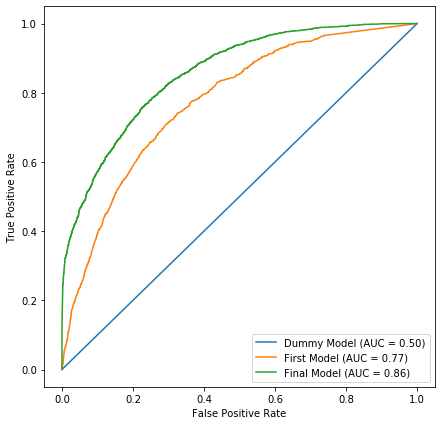

In [133]:
fig, ax = plt.subplots(figsize=(7,7))

plot_roc_curve(dummy_model, X_test, y_test, name="Dummy Model", ax=ax)
plot_roc_curve(first_model, X_test[["age", "education_num", "hours_per_week"]], y_test, name="First Model", ax=ax)
plot_roc_curve(final_model, X_test_with_ohe, y_test, name="Final Model", ax=ax);